<a href="https://colab.research.google.com/github/ShovalBenjer/ShovalBenjer/blob/main/Marketing_Social_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TL;DR**
author - Shoval Benjer

How to Run:
in runtime, press run all cells. the first cell will ask you to upload 2 files, data1.xlsx, data2.xlsx i attached. after that should run without any issues.

This notebook demonstrates a reproducible data analysis workflow for:
1. **Loading** and exploring data.
2. **Calculating** new KPIs (e.g., cost per purchase, cost per checkout, ROAS, AOV).
3. **Analyzing** trends by time period (day/week/month) and demographics (age, gender).
4. **Investigating** creative performance metrics (video engagement funnel) and offering improvement suggestions.
5. **Recommending** data-driven optimizations to improve overall account performance and conversion rates.

Below is a structured Jupyter Notebook example that demonstrates how to:
1. Load **data1.csv** and **data2.csv** into separate dataframes.
2. Explore and understand each column.
3. Create pivot tables and calculated metrics to answer the given questions.
4. Provide potential improvements based on the analysis.

---

## Step-by-Step Analysis Workflow

### 1. Initial Setup and Imports



In [2]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Upload the files
uploaded = files.upload()

# Load Excel files into DataFrames
df1 = pd.read_excel('data1.xlsx')
df2 = pd.read_excel('data2.xlsx')

# Preview the first few rows of each dataset
print("Data1 (df1) Preview:")
display(df1.head())

print("Data2 (df2) Preview:")
display(df2.head())

Saving data1.xlsx to data1.xlsx
Saving data2.xlsx to data2.xlsx
Data1 (df1) Preview:


,Reporting starts,Reporting ends,Ad name,Age,Gender,Date created,Ad delivery,Campaign name,Ad Set Name,Ad set budget,...,Link clicks,CPC,CPM,Landing page views,Adds to cart,Cost per ATC,Checkouts Initiated,Cost per Checkout,Purchases conversion value,ROAS
0,2023-01-31,2023-01-31,T0~H23~AE21908_V2_Long cta2 +written cta(EF118...,65+,unknown,2023-01-26,not_delivering,ColdTraffic~US~ABO~A1~Test284~short informativ...,V2~BudgetRule~HH~US~FM~45+~Open~dvM~pfFBpmNF~A...,8100,...,NaN,NaN,11.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-31,2023-01-31,T0~H23~AE17829_V4_informative +Testi no middl...,65+,unknown,2022-10-24,inactive,Remarketing~ABO~A1~T-,daily_on~Daily_off_00:00~Daily~WW~FM~18+~PE 36...,240,...,1.0,1.25,58.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-31,2023-01-31,T0~H23~v5~TB15~cInformative~fVSL~pgAB,65+,unknown,2022-10-31,active,ColdTraffic~US~ABO~A1~Engagement,ENG~Daily~US~FM~Open~dvAll~pfpmAutomatic~ACQ~W...,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-31,2023-01-31,T42_H1_RC5372_i_2_GetPerfectA1-3293587560763817,65+,unknown,2022-11-24,active,Remarketing~ABO~A1~T-,daily_on~Daily_off_00:00~BF~Daily~WW~FM~18+~IC...,150,...,NaN,NaN,46.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-31,2023-01-31,T0~H23~AE15285_V1_ paloma stock (EF12271_v_1)~...,65+,unknown,2022-07-02,inactive,Remarketing~ABO~A1~T-,HHnew~US~FM~18+~VV3s 365d+PV 180d+ATC+ICO+Purc...,269850,...,NaN,NaN,63.636364,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data2 (df2) Preview:


,Reporting starts,Reporting ends,Impressions,Reach,Amount spent (USD),"CPM (cost per 1,000 impressions) (USD)",Link clicks,CPC (cost per link click) (USD),3-second video plays,3 seconds VV (%) from impressions,...,Video plays at 50%,% Players in 50% from impressions,Video plays at 75%,% Players in 75% from impressions,Video plays at 95%,% Players in 95% from impressions,Video plays at 100%,Video plays,Cost per VV,Video average play time
0,2022-11-24,2023-02-15,63739.0,59136.0,2392.62,37.537771,3418,0.700006,44270,0.694551,...,17256.0,0.270729,7878.0,0.123598,2426.0,0.038061,1905.0,61760.0,0.038741,19.0
1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We load each file (`data1.csv` → `df1`, `data2.csv` → `df2`) using `pd.read_csv()`.  
- We inspect the first few rows with `head()` and check the data types with `info()`. This helps confirm that the CSV files are read in correctly and lets us understand the structure of each column.


In [3]:
"""
Explore df1 to ensure we fully understand each column.
We'll print unique values, data types, and basic stats.
"""

print("Data1 - Summary Statistics:")
display(df1.describe(include='all'))

categorical_cols = ['Reporting starts', 'Reporting ends', 'Ad name', 'Age',
                    'Gender', 'Date created', 'Ad delivery', 'Campaign name',
                    'Ad Set Name', 'Ad set budget type', 'Attribution setting']
for col in categorical_cols:
    unique_vals = df1[col].unique()
    print(f"\nColumn '{col}' unique values (first 10): {unique_vals[:10]}")

numeric_cols = ['Ad set budget', 'CVR%', 'Purchases', 'Amount spent (USD)', 'Reach',
                'Frequency', 'Impressions', 'Link clicks', 'CPC', 'CPM',
                'Landing page views', 'Adds to cart', 'Cost per ATC',
                'Checkouts Initiated', 'Cost per Checkout', 'Purchases conversion value', 'ROAS']
print("\nNumeric columns in df1:")
print(numeric_cols)

Data1 - Summary Statistics:


,Reporting starts,Reporting ends,Ad name,Age,Gender,Date created,Ad delivery,Campaign name,Ad Set Name,Ad set budget,...,Link clicks,CPC,CPM,Landing page views,Adds to cart,Cost per ATC,Checkouts Initiated,Cost per Checkout,Purchases conversion value,ROAS
count,42955,42955,42955,42955,42955,42955,42955,42955,42955,42955.0,...,23131.000000,23131.000000,41437.000000,20692.000000,5954.000000,5954.000000,4077.000000,4077.000000,3248.000000,3247.000000
unique,NaN,NaN,121,8,3,NaN,4,29,85,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,T0~H23~AE17829_V4_informative +Testi no middl...,65+,male,NaN,active,Remarketing~ABO~A1~T-,daily_off~daily_on~ASC_Mockup~Daily~US~FM~18+~...,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6013,9158,16030,NaN,20955,22618,6814,6814.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022-12-20 17:24:11.314166016,2022-12-20 17:24:11.314166016,NaN,NaN,NaN,2022-09-01 00:34:59.909207040,NaN,NaN,NaN,NaN,...,16.236739,1.623606,85.942453,15.613136,2.067518,28.269474,1.548688,41.519163,187.779895,12.599584
min,2022-11-01 00:00:00,2022-11-01 00:00:00,NaN,NaN,NaN,2020-02-13 00:00:00,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.746269,1.000000,1.000000,0.000000,1.000000,0.000000,4.950000,0.071573
25%,2022-11-29 00:00:00,2022-11-29 00:00:00,NaN,NaN,NaN,2022-10-24 00:00:00,NaN,NaN,NaN,NaN,...,2.000000,0.660000,24.755989,2.000000,1.000000,10.350000,1.000000,15.400000,107.850000,1.697537
50%,2022-12-24 00:00:00,2022-12-24 00:00:00,NaN,NaN,NaN,2022-11-10 00:00:00,NaN,NaN,NaN,NaN,...,5.000000,1.160000,45.454545,4.000000,1.000000,21.530000,1.000000,31.529100,123.995000,3.328571
75%,2023-01-11 00:00:00,2023-01-11 00:00:00,NaN,NaN,NaN,2022-12-13 00:00:00,NaN,NaN,NaN,NaN,...,15.000000,2.015000,83.333333,14.000000,2.000000,37.831250,2.000000,55.910000,215.882500,7.031952
max,2023-01-31 00:00:00,2023-01-31 00:00:00,NaN,NaN,NaN,2023-01-26 00:00:00,NaN,NaN,NaN,NaN,...,1252.000000,36.920000,4400.000000,1342.000000,27.000000,245.430000,15.000000,441.090000,2180.920000,3550.000000



Column 'Reporting starts' unique values (first 10): <DatetimeArray>
['2023-01-31 00:00:00', '2023-01-30 00:00:00', '2023-01-29 00:00:00',
 '2023-01-28 00:00:00', '2023-01-27 00:00:00', '2023-01-26 00:00:00',
 '2023-01-25 00:00:00', '2023-01-24 00:00:00', '2023-01-23 00:00:00',
 '2023-01-22 00:00:00']
Length: 10, dtype: datetime64[ns]

Column 'Reporting ends' unique values (first 10): <DatetimeArray>
['2023-01-31 00:00:00', '2023-01-30 00:00:00', '2023-01-29 00:00:00',
 '2023-01-28 00:00:00', '2023-01-27 00:00:00', '2023-01-26 00:00:00',
 '2023-01-25 00:00:00', '2023-01-24 00:00:00', '2023-01-23 00:00:00',
 '2023-01-22 00:00:00']
Length: 10, dtype: datetime64[ns]

Column 'Ad name' unique values (first 10): ['T0~H23~AE21908_V2_Long cta2 +written cta(EF11835_v_7)_1~TB2~cInformative~fVSL~pgAB~5748833758572506'
 'T0~H23~AE17829_V4_informative +Testi  no middle CTA (AE15285_V1)~TB17~cMixed~fVSL~pgAB~5372079036247982'
 'T0~H23~v5~TB15~cInformative~fVSL~pgAB'
 'T42_H1_RC5372_i_2_GetPerfectA1-

In [4]:
"""
We compute and/or confirm existing KPIs, then create additional columns if needed, such as:
- cost_per_click (if not provided)
- cost_per_purchase
- cost_per_checkout
- cost_per_add_to_cart (ATC)
- ROAS (return_on_ad_spend)
- AOV (average order value = purchase value / purchases if purchases != 0)
- Conversion rate (CVR%) if needed

We also consider the 'Target ROAS' of 1.2 for performance comparisons.
"""

df1['Calculated_Cost_Per_Click'] = df1['Amount spent (USD)'] / np.where(df1['Link clicks'] == 0, 1, df1['Link clicks'])
df1['Calculated_Cost_Per_Purchase'] = df1['Amount spent (USD)'] / np.where(df1['Purchases'] == 0, 1, df1['Purchases'])
df1['Calculated_Cost_Per_Checkout'] = df1['Amount spent (USD)'] / np.where(df1['Checkouts Initiated'] == 0, 1, df1['Checkouts Initiated'])
df1['Calculated_Cost_Per_ATC'] = df1['Amount spent (USD)'] / np.where(df1['Adds to cart'] == 0, 1, df1['Adds to cart'])

# If there's a separate column for conversion value, we can recalculate ROAS too, if needed:
df1['Calculated_ROAS'] = df1['Purchases conversion value'] / np.where(df1['Amount spent (USD)'] == 0, 1, df1['Amount spent (USD)'])

# AOV (Average Order Value) - only apply where Purchases > 0
df1['AOV'] = np.where(df1['Purchases'] > 0, df1['Purchases conversion value'] / df1['Purchases'], 0)

# Validate our new columns
print("New Columns in df1:")
display(df1[['Calculated_Cost_Per_Click', 'Calculated_Cost_Per_Purchase', 'Calculated_Cost_Per_Checkout',
             'Calculated_Cost_Per_ATC', 'Calculated_ROAS', 'AOV']].head())

New Columns in df1:


,Calculated_Cost_Per_Click,Calculated_Cost_Per_Purchase,Calculated_Cost_Per_Checkout,Calculated_Cost_Per_ATC,Calculated_ROAS,AOV
0,NaN,NaN,NaN,NaN,NaN,0.0
1,1.25,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0


- We handle division by zero by using `np.where(...) == 0, 1` to avoid errors.  
- We compare these calculated columns to existing ones (e.g., `CPC`, `CPM`) for consistency.  
- We also compute **AOV** (Average Order Value) and confirm or create **ROAS** if needed.  
- **Target ROAS** is 1.2, so we will compare each campaign/ad set’s performance against that threshold.

In [5]:
"""
Analyze performance by:
- Day of week
- Week
- Month

We'll extract date components from 'Reporting starts' or 'Reporting ends'
(assuming these columns contain valid date/time strings).
"""

# Convert date columns to datetime
df1['Reporting starts'] = pd.to_datetime(df1['Reporting starts'])
df1['Reporting ends'] = pd.to_datetime(df1['Reporting ends'])

# Extract day name, week number, month
df1['Start_DayOfWeek'] = df1['Reporting starts'].dt.day_name()
df1['Start_Week'] = df1['Reporting starts'].dt.isocalendar().week
df1['Start_Month'] = df1['Reporting starts'].dt.month

# Pivot table by day of week
pivot_day_of_week = pd.pivot_table(
    df1,
    index='Start_DayOfWeek',
    values=['Amount spent (USD)', 'Purchases conversion value', 'Calculated_ROAS', 'AOV'],
    aggfunc='mean'
).sort_values(by='Calculated_ROAS', ascending=False)

print("Pivot by Day of Week:")
display(pivot_day_of_week)

# Pivot table by week
pivot_week = pd.pivot_table(
    df1,
    index='Start_Week',
    values=['Amount spent (USD)', 'Purchases conversion value', 'Calculated_ROAS', 'AOV'],
    aggfunc='mean'
).sort_values(by='Calculated_ROAS', ascending=False)

print("Pivot by Week:")
display(pivot_week)

# Pivot table by month
pivot_month = pd.pivot_table(
    df1,
    index='Start_Month',
    values=['Amount spent (USD)', 'Purchases conversion value', 'Calculated_ROAS', 'AOV'],
    aggfunc='mean'
).sort_values(by='Calculated_ROAS', ascending=False)

print("Pivot by Month:")
display(pivot_month)

Pivot by Day of Week:


,AOV,Amount spent (USD),Calculated_ROAS,Purchases conversion value
Start_DayOfWeek,,,,
Saturday,10.383608,14.728176,15.332102,201.507237
Monday,8.756559,10.314757,14.239658,174.402326
Wednesday,8.015642,10.123687,13.020525,169.958193
Friday,8.535895,10.696104,11.979732,179.836799
Thursday,8.558054,9.985576,11.439232,185.846978
Tuesday,8.121809,10.244375,11.056038,187.617260
Sunday,10.428937,15.008405,10.902123,205.798418


Pivot by Week:


,AOV,Amount spent (USD),Calculated_ROAS,Purchases conversion value
Start_Week,,,,
47,9.272314,11.132639,28.370066,173.766459
44,9.310695,12.677343,26.429454,169.651613
2,7.341767,9.355093,14.805688,168.314919
4,8.713636,9.608145,14.482999,186.877491
46,8.161827,10.034063,13.091838,177.590051
49,9.682757,13.585042,12.521344,177.201549
51,8.305117,9.623423,11.202530,189.100553
3,8.332471,9.334225,10.243972,172.022750
45,9.325644,11.844225,10.068777,170.398676


Pivot by Month:


,AOV,Amount spent (USD),Calculated_ROAS,Purchases conversion value
Start_Month,,,,
11,8.946026,11.138084,18.326777,172.541450
1,8.946785,11.706870,11.014016,190.446274
12,9.043923,11.857912,10.153403,196.212298


- We generate pivot tables to discover which day/week/month yields the best **ROAS**, **AOV**, etc.  
- Sorting by **Calculated_ROAS** helps us quickly see the best time periods.  
- We can expand the pivot to include more metrics like **CVR%**, **Frequency**, or **Reach** if needed.

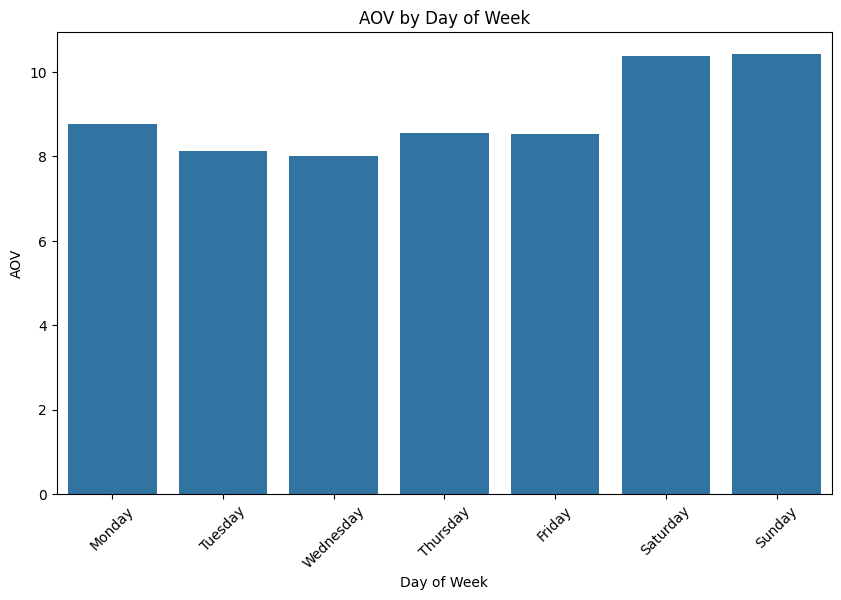

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort day names to maintain logical order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_day_of_week_sorted = pivot_day_of_week.loc[day_order]

# Plot trends by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_day_of_week_sorted.reset_index(), x='Start_DayOfWeek', y='AOV', order=day_order)
plt.title("AOV by Day of Week")
plt.ylabel("AOV")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()



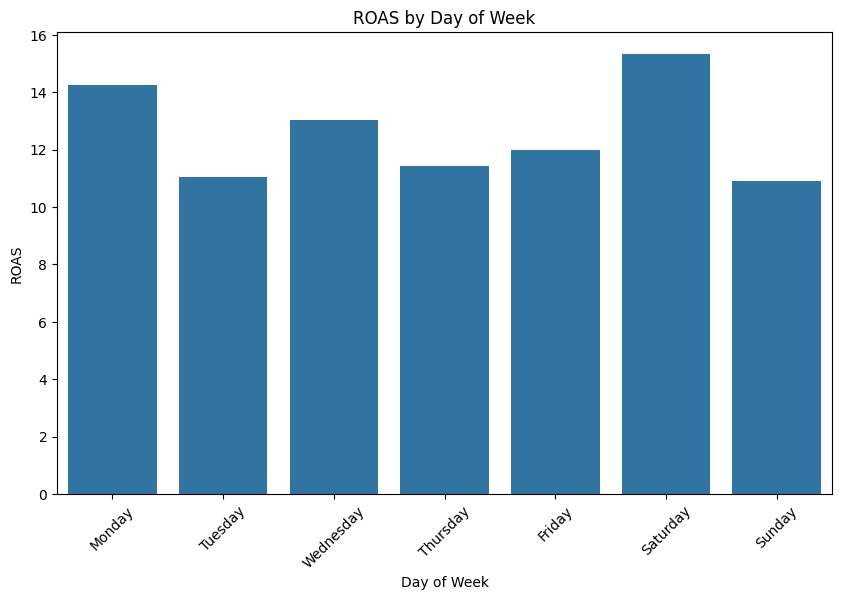

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_day_of_week_sorted.reset_index(), x='Start_DayOfWeek', y='Calculated_ROAS', order=day_order)
plt.title("ROAS by Day of Week")
plt.ylabel("ROAS")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

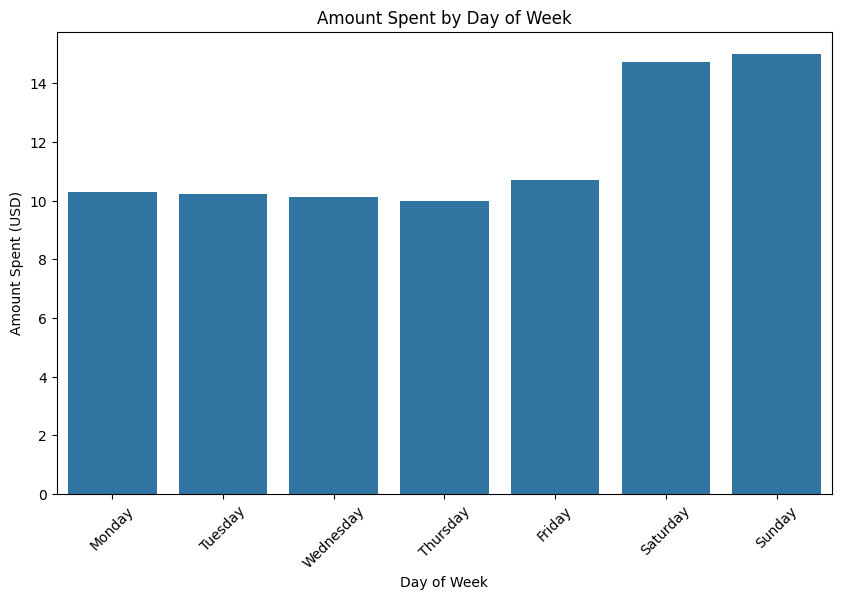

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_day_of_week_sorted.reset_index(), x='Start_DayOfWeek', y='Amount spent (USD)', order=day_order)
plt.title("Amount Spent by Day of Week")
plt.ylabel("Amount Spent (USD)")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

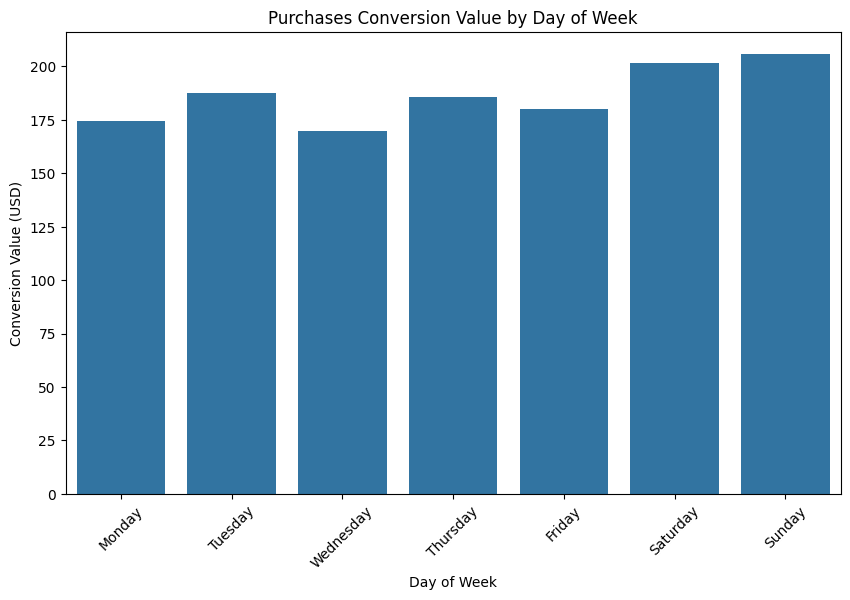

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_day_of_week_sorted.reset_index(), x='Start_DayOfWeek', y='Purchases conversion value', order=day_order)
plt.title("Purchases Conversion Value by Day of Week")
plt.ylabel("Conversion Value (USD)")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

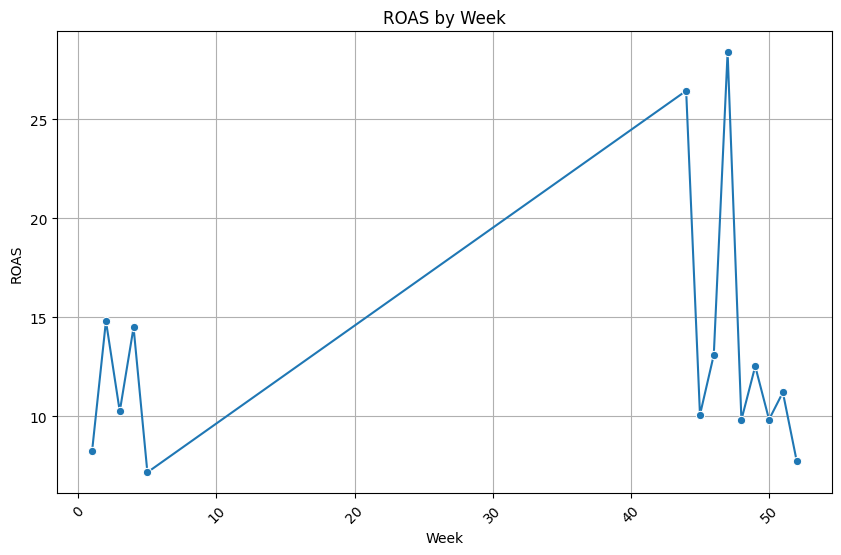

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_week.reset_index(), x='Start_Week', y='Calculated_ROAS', marker='o')
plt.title("ROAS by Week")
plt.ylabel("ROAS")
plt.xlabel("Week")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
"""
We will create a pivot table at the Campaign and Ad Set level.
Look for ways to improve performance by comparing key KPIs:
- ROAS
- CPC
- Cost per Purchase
- Frequency
"""

pivot_campaign = pd.pivot_table(
    df1,
    index=['Campaign name', 'Ad Set Name'],
    values=['Calculated_ROAS', 'Calculated_Cost_Per_Click', 'Calculated_Cost_Per_Purchase',
            'Frequency', 'Amount spent (USD)'],
    aggfunc='mean'
).sort_values(by='Calculated_ROAS', ascending=False)

print("Pivot by Campaign & Ad Set:")
display(pivot_campaign.head(20))

# Identify underperforming campaigns
underperformers = pivot_campaign[pivot_campaign['Calculated_ROAS'] < 1.2]
print("\nUnderperforming Campaigns/Ad Sets (ROAS < 1.2):")
display(underperformers)


Pivot by Campaign & Ad Set:


,,Amount spent (USD),Calculated_Cost_Per_Click,Calculated_Cost_Per_Purchase,Calculated_ROAS,Frequency
Campaign name,Ad Set Name,,,,,
**Internal Campaign - PerfectA1 Testimonial Solicitation,PerfectA1 Customers,1.513092,0.904514,4.938148,130.573812,1.980375
ColdTraffic~US~ABO~A1~Test269~Testimonial Time cuts~18237,Control~HH~US~FM~45+~newINT~dvM~pfFBpmNF~ACQ~Wday~A1~18237,9.692991,1.687476,11.693333,64.944947,1.010395
Remarketing~ABO~A1~T-,Copy_NY2023~Daily~WW~FM~18+~ICO+ATC+75%VSL VV 7d~dvAll~pfpmAutomatic~~Remarketing~Wday~A1,2.202863,2.622440,4.490000,61.512456,1.462138
ColdTraffic~US~ABO~A1~Test271~5 Pixels TB2~20468,v2~HH~US~FM~45+~newINT~dvM~pfFB_pmNF~ACQ~BudgetRule~Wday~A1~20468,6.895094,2.236871,2.705000,38.160813,1.016858
ColdTraffic~US~ABO~A1~Test283~Massage for tight skin (Images)~21040,v4~HH~US~FM~45+~Open~dvM~pfFBpmNF~ACQ~Wday~A1,5.746056,2.185400,5.775000,33.796964,1.031433
ColdTraffic~US~ABO~A1~NY2023.1,Android~HH~US~FM~18+~Open~dvAll~pfpmAll~ACQ~Wday~Android~BidAdj_iPhone_0.8Female0.9,3.802825,1.449248,15.648833,29.510570,1.024530
ColdTraffic~US~ABO~A1~Test274~Paloma informative split screen~20270,v1~HH~US~FM~45+~newINT~dvM~pfFBpmNF~ACQ~BudgetRule~Wday~A1~20270,11.675833,1.672178,10.310000,26.547039,1.012102
Remarketing~ABO~A1~T-,"daily_on~Daily_off_00:00~BF~Daily~WW~FM~18+~ICO+ATC 30d,VV3s+PE+PV+7d~dvAll~pfpmAutomatic~Remarketing~Wday~A1~BidAdj0.7female~T-CPA_91",8.920680,2.232980,34.095836,25.940621,1.544575
ColdTraffic~US~ABO~A1~Test269~Testimonial Time cuts~18237,v1~HH~US~FM~45+~newINT~dvM~pfFBpmNF~ACQ~Wday~A1~18237,9.461102,2.099102,10.088333,25.089792,1.002379



Underperforming Campaigns/Ad Sets (ROAS < 1.2):


,,Amount spent (USD),Calculated_Cost_Per_Click,Calculated_Cost_Per_Purchase,Calculated_ROAS,Frequency
Campaign name,Ad Set Name,,,,,


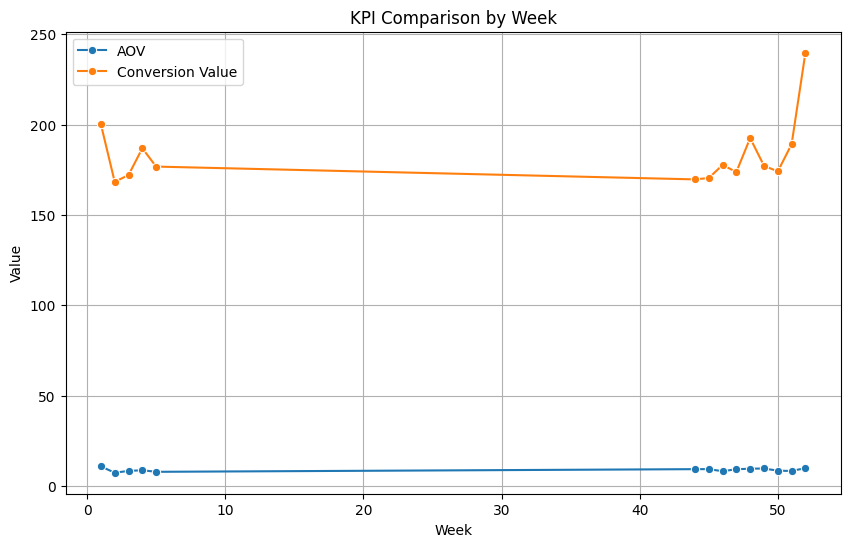

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_week.reset_index(), x='Start_Week', y='AOV', label='AOV', marker='o')
sns.lineplot(data=pivot_week.reset_index(), x='Start_Week', y='Purchases conversion value', label='Conversion Value', marker='o')
plt.title("KPI Comparison by Week")
plt.ylabel("Value")
plt.xlabel("Week")
plt.legend()
plt.grid(True)
plt.show()

- A **Calculated_ROAS** below 1.2 indicates underperformance relative to the target.  
- We can refine recommendations:
  - Increase or decrease daily budget
  - Adjust audience or creative
  - Optimize bids
  - Evaluate Frequency (if frequency is too high, it may indicate ad fatigue)

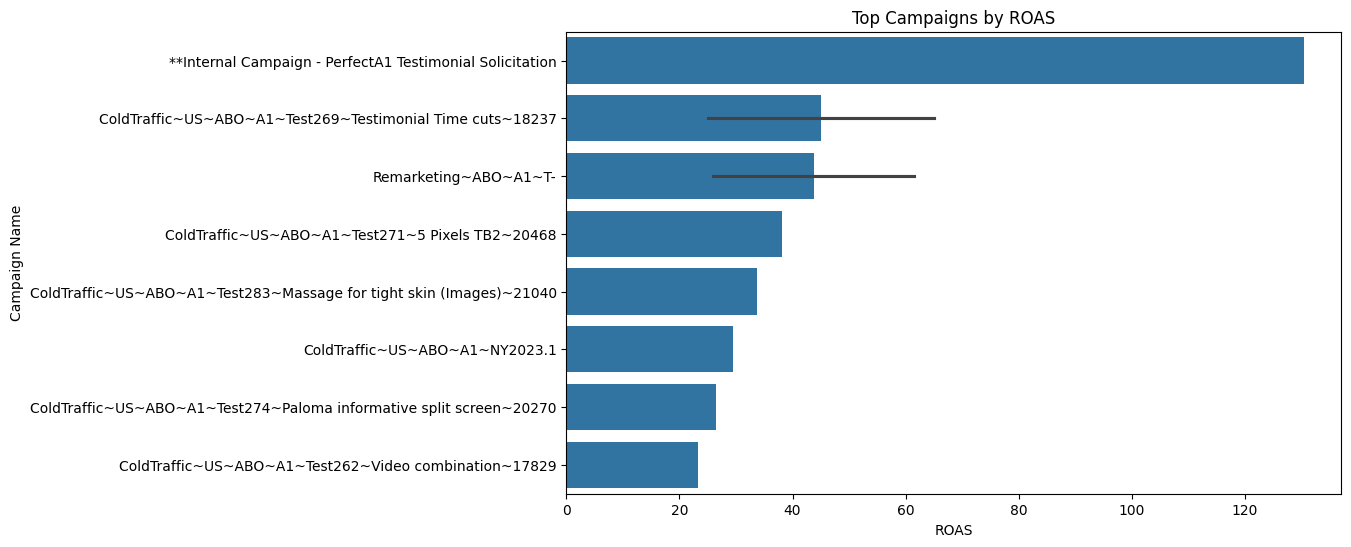

In [13]:
# Top 10 campaigns by ROAS
top_campaigns = pivot_campaign.head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_campaigns, x='Calculated_ROAS', y='Campaign name')
plt.title("Top Campaigns by ROAS")
plt.xlabel("ROAS")
plt.ylabel("Campaign Name")
plt.show()

In [14]:
"""
Break down performance by age and gender to derive insights on:
- CPC
- Cost per Purchase
- ROAS
- Conversion Rate (CVR%)

We'll create pivot tables grouped by Age and Gender.
"""

pivot_age_gender = pd.pivot_table(
    df1,
    index=['Age', 'Gender'],
    values=['Calculated_ROAS', 'Calculated_Cost_Per_Click', 'Calculated_Cost_Per_Purchase', 'CVR%', 'Frequency'],
    aggfunc='mean'
).sort_values(by='Calculated_ROAS', ascending=False)

print("Pivot by Age & Gender:")
display(pivot_age_gender)

Pivot by Age & Gender:


,,CVR%,Calculated_Cost_Per_Click,Calculated_Cost_Per_Purchase,Calculated_ROAS,Frequency
Age,Gender,,,,,
18-24,male,0.368308,0.768503,4.443294,233.610971,1.249951
35-44,unknown,0.833333,0.381696,0.374000,214.886038,1.233960
65+,unknown,0.668519,0.968207,2.686853,192.803569,1.264585
18-24,female,0.424286,0.651698,2.439997,114.601904,1.240952
45-54,unknown,0.484375,0.604053,1.828962,113.987758,1.199869
25-34,female,0.424633,0.969770,3.731552,83.539897,1.306120
55-64,unknown,0.699634,0.819180,1.832667,82.044574,1.237680
25-34,male,0.260714,1.038006,13.257847,34.039719,1.192734
35-44,female,0.306240,1.467959,8.893250,33.877649,1.198061


- By sorting on **Calculated_ROAS**, we see which age/gender segments exceed or miss the **1.2** target.  
- High **CPC** could suggest audience saturation or less relevant segments.  
- High **CVR%** means the ad resonates well with that audience segment.  
- We use these insights to decide whether to allocate more budget or refine the targeting strategy.

**Account Trend Insights:**
1. **Best Period**: Identify the timeframe with the highest average ROAS and consistent conversions.  
2. **KPI Differences**: Compare CPC, CPM, and CVR% across different time periods to see if costs were lower or conversion rates were higher.  

**Campaign Improvements:**
- For campaigns with **ROAS < 1.2**, consider:
  - Testing new creatives or ad copy.
  - Adjusting bid strategies or daily budgets.
  - Targeting high-ROAS demographics (e.g., a certain age or gender group).
  - Evaluating ad frequency to reduce fatigue.

**Audience Breakdown Insights:**
- Allocate more budget to high-ROAS age/gender groups.
- Exclude or reduce spend on underperforming segments.
- Consider running A/B tests for different audience splits to validate improvements.


In [15]:
"""
Perform a quick exploration of df2 to understand video performance:
- Impressions, Reach, Amount Spent
- CPM, CPC
- Video plays at 3s, 15s, 25%, 50%, 75%, 95%, 100%

We'll look at summary statistics and any relevant pivot/breakdowns.
"""
print("Data2 - Summary Statistics:")
display(df2.describe(include='all'))

print("Video Performance Columns:")
display(df2.columns)

Data2 - Summary Statistics:


,Reporting starts,Reporting ends,Impressions,Reach,Amount spent (USD),"CPM (cost per 1,000 impressions) (USD)",Link clicks,CPC (cost per link click) (USD),3-second video plays,3 seconds VV (%) from impressions,...,Video plays at 50%,% Players in 50% from impressions,Video plays at 75%,% Players in 75% from impressions,Video plays at 95%,% Players in 95% from impressions,Video plays at 100%,Video plays,Cost per VV,Video average play time
count,1,1,1.0,1.0,1.00,1.000000,3.0,5.000000,5.0,5.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.000000,5.0,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,0.700006,44270.0,0.694551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022-11-24 00:00:00,2023-02-15 00:00:00,63739.0,59136.0,2392.62,37.537771,NaN,NaN,NaN,NaN,...,17256.0,0.270729,7878.0,0.123598,2426.0,0.038061,1905.0,61760.0,0.038741,19.0
min,2022-11-24 00:00:00,2023-02-15 00:00:00,63739.0,59136.0,2392.62,37.537771,NaN,NaN,NaN,NaN,...,17256.0,0.270729,7878.0,0.123598,2426.0,0.038061,1905.0,61760.0,0.038741,19.0
25%,2022-11-24 00:00:00,2023-02-15 00:00:00,63739.0,59136.0,2392.62,37.537771,NaN,NaN,NaN,NaN,...,17256.0,0.270729,7878.0,0.123598,2426.0,0.038061,1905.0,61760.0,0.038741,19.0
50%,2022-11-24 00:00:00,2023-02-15 00:00:00,63739.0,59136.0,2392.62,37.537771,NaN,NaN,NaN,NaN,...,17256.0,0.270729,7878.0,0.123598,2426.0,0.038061,1905.0,61760.0,0.038741,19.0
75%,2022-11-24 00:00:00,2023-02-15 00:00:00,63739.0,59136.0,2392.62,37.537771,NaN,NaN,NaN,NaN,...,17256.0,0.270729,7878.0,0.123598,2426.0,0.038061,1905.0,61760.0,0.038741,19.0
max,2022-11-24 00:00:00,2023-02-15 00:00:00,63739.0,59136.0,2392.62,37.537771,NaN,NaN,NaN,NaN,...,17256.0,0.270729,7878.0,0.123598,2426.0,0.038061,1905.0,61760.0,0.038741,19.0


Video Performance Columns:


Index(['Reporting starts', 'Reporting ends', 'Impressions', 'Reach',
       'Amount spent (USD)', 'CPM (cost per 1,000 impressions) (USD)',
       'Link clicks', 'CPC (cost per link click) (USD)',
       '3-second video plays', '3 seconds VV (%) from impressions',
       '3%vv from video plays', '15 seconds %', '15 seconds video plays',
       'Video plays at 25%', '% Players in 25% VE from impressions',
       'Video plays at 50%', '% Players in 50% from impressions',
       'Video plays at 75%', '% Players in 75% from impressions',
       'Video plays at 95%', '% Players in 95% from impressions',
       'Video plays at 100%', 'Video plays', 'Cost per VV',
       'Video average play time'],
      dtype='object')

- The columns in `df2` focus on video engagement metrics.  
- We note metrics like **3-second video plays**, **3 seconds VV%** (view-through rate), **15 seconds %**, and deeper engagement (25%, 50%, 75%, 95%, 100% completion).  
- Understanding where viewers drop off can help us optimize the first few seconds of the video.

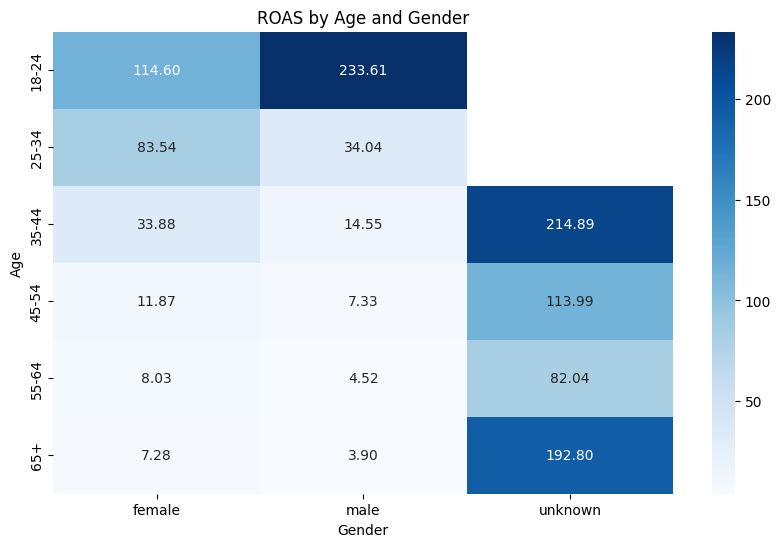

In [19]:
plt.figure(figsize=(10, 6))
pivot_heatmap = pivot_age_gender.pivot_table(index='Age', columns='Gender', values='Calculated_ROAS')
sns.heatmap(pivot_heatmap, annot=True, fmt=".2f", cmap="Blues")
plt.title("ROAS by Age and Gender")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.show()

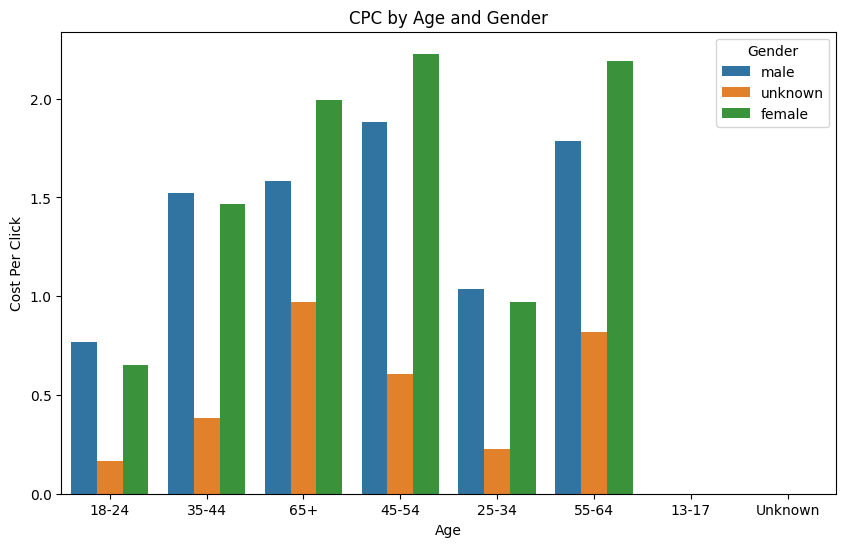

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_age_gender.reset_index(), x='Age', y='Calculated_Cost_Per_Click', hue='Gender')
plt.title("CPC by Age and Gender")
plt.ylabel("Cost Per Click")
plt.xlabel("Age")
plt.legend(title="Gender")
plt.show()

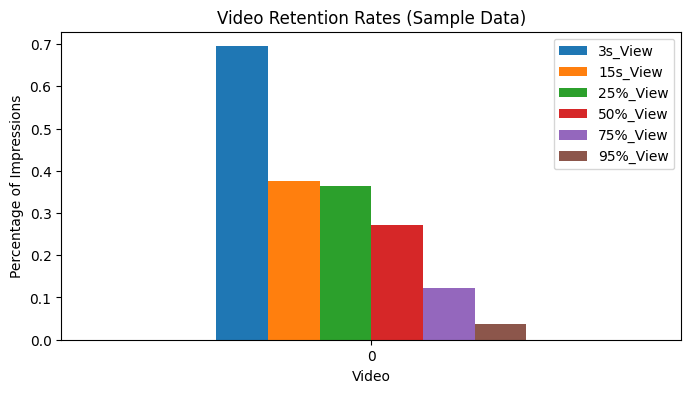

In [16]:
"""
We can visualize video engagement across the funnel:
- 3-second retention
- 15-second retention
- 25%, 50%, 75%, 95% view rates

We'll use the sums or means provided in df2, or the sample 'chart for data2' you mentioned.
"""

# Example chart using the provided summary of retention percentages
chart_data = {
    '3s_View': [0.694551],
    '15s_View': [0.375405],
    '25%_View': [0.364471],
    '50%_View': [0.270729],
    '75%_View': [0.123598],
    '95%_View': [0.038061]
}

df_chart = pd.DataFrame(chart_data)

ax = df_chart.plot(kind='bar', figsize=(8,4), rot=0)
ax.set_title("Video Retention Rates (Sample Data)")
ax.set_xlabel("Video")
ax.set_ylabel("Percentage of Impressions")
plt.show()

- We see a drop from ~69% at 3s to ~37% at 15s.  
- This indicates many viewers leave within the first 15 seconds.  
- We can refine the opening hook, key messaging, or pacing to retain viewers longer.

**1. Key Messages (video1)**
- Identify the main selling points or calls to action (CTA) within the first 3-5 seconds to keep viewers engaged.

**2. Target Audience**
- Based on Age/Gender from df1 and initial data from df2 (reach, impressions), identify the best-fit demographics.  
- Cross-reference with audience segments that delivered the highest ROAS in df1.

**3. Improvement Suggestions**
- Shorten or strengthen the video intro.
- Emphasize the CTA earlier.
- Use subtitles or attention-grabbing visuals early on.

**4. Testing Approach**
- **KPIs**: Evaluate 3-second view rate, 15-second view rate, CPC, ROAS.
- **Structure**: A/B test the new hook vs. current video.  
- **Number of Signals**: Test 2-3 variations, focusing on different hooks or visual introductions.

---

# Funnel Review

**1. Key Messages**
- What the funnel communication focuses on: problem statement, solution, benefits, CTA.

**2. Target Audience**
- Aligned with df1’s top-performing demographics.

**3. Funnel Improvements**
- Ensure minimal steps between ad click and final conversion.
- Place stronger CTAs, reduce friction (e.g., simpler forms).

**4. 5-Second Hook Intros**
Examples:
1. "Tired of high costs? Discover your savings now!"
2. "See how we boosted ROAS by 50% in one week!"
3. "Maximize your results—starting in the next 5 seconds!"
4. "Ready for a change? Let’s unlock your potential!"
5. "Transform your [Goal] in the time it takes to blink!"

---